In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
## Getting the data.

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data_train = data.copy()

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

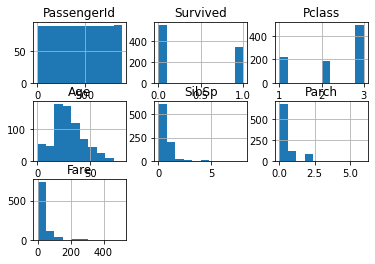

In [5]:
data_train.hist()

In [6]:
data_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [7]:
data_train['Sex'] = data_train['Sex'].map({'male' : 0, 'female' : 1})

In [8]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [9]:
data_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [11]:
## PassengerId, Ticket, Cabin, Name
data_train.drop(columns = ['PassengerId', 'Ticket', 'Cabin', 'Name', 'SibSp'], axis = 1, inplace = True)

In [12]:
data_train

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,0,22.0,0,7.2500,S
1,1,1,1,38.0,0,71.2833,C
2,1,3,1,26.0,0,7.9250,S
3,1,1,1,35.0,0,53.1000,S
4,0,3,0,35.0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,13.0000,S
887,1,1,1,19.0,0,30.0000,S
888,0,3,1,NaN,2,23.4500,S
889,1,1,0,26.0,0,30.0000,C


In [13]:
data_train['Embarked'] = data_train['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})

In [14]:
data_train

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,0,22.0,0,7.2500,0.0
1,1,1,1,38.0,0,71.2833,1.0
2,1,3,1,26.0,0,7.9250,0.0
3,1,1,1,35.0,0,53.1000,0.0
4,0,3,0,35.0,0,8.0500,0.0
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,13.0000,0.0
887,1,1,1,19.0,0,30.0000,0.0
888,0,3,1,NaN,2,23.4500,0.0
889,1,1,0,26.0,0,30.0000,1.0


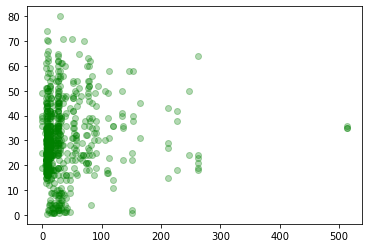

In [16]:
plt.scatter(data_train['Fare'], data_train['Age'], alpha = 0.3, color = 'green')

In [17]:
data_train['Age'] = data_train['Age'].fillna(data_train['Age'].mean())

In [18]:
data_train['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [19]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 48.9 KB


In [20]:
data_train = data_train.dropna()

In [21]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 55.6 KB


In [22]:
X = data_train.drop(columns = ['Survived'], axis = 1)
y = data_train['Survived']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [125]:
model1 = LogisticRegression(C = 1)

In [ ]:
model2 = DecisionTreeClassifier()

In [138]:
model3 = RandomForestClassifier(n_estimators= 700)

In [126]:
model1.fit(X_train, y_train)

LogisticRegression(C=1)

In [127]:
model1.score(X_test, y_test)

0.8426966292134831

In [128]:
model2.fit(X_train, y_train)

DecisionTreeClassifier()

In [129]:
model2.score(X_test, y_test)

0.8258426966292135

In [139]:
model3.fit(X_train, y_train)

RandomForestClassifier(n_estimators=700)

In [140]:
model3.score(X_test, y_test)

0.8707865168539326

In [141]:
import pickle

In [142]:
pickle.dump(model1, open("Titanic_Model_Logistic.sav", "wb"))
pickle.dump(model2, open("Titanic_Model_Decision.sav", "wb"))
pickle.dump(model3, open("Titanic_Model_Random.sav", "wb"))